 # Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Loading the dataset

In [2]:
df = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.shape[1]

13

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
df = df.drop(columns= ['Id'])

df.to_csv('updated_wine_quality.csv', index=False)

In [6]:
data = pd.read_csv('/kaggle/working/updated_wine_quality.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data analysis

In [7]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [9]:
num_wines = data.shape[0]
print(f'The dataset contains {num_wines} wine samples.')

The dataset contains 1143 wine samples.


# Number of wines with specific quality ratings

In [10]:
n_wines = data.shape[0]
quality_above_6 = data.loc[(data['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]
quality_below_5 = data.loc[(data['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]
quality_between_5 = data.loc[(data['quality'] >= 5) & (data['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]
greater_percent = n_above_6*100/n_wines
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(greater_percent))
display(np.round(data.describe()))

Total number of wine data: 1143
Wines with rating 7 and above: 159
Wines with rating less than 5: 39
Wines with rating 5 and 6: 945
Percentage of wines with quality 7 and above: 13.91%


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,21.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,13.0,37.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,61.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,68.0,289.0,1.0,4.0,2.0,15.0,8.0


# Data visualization

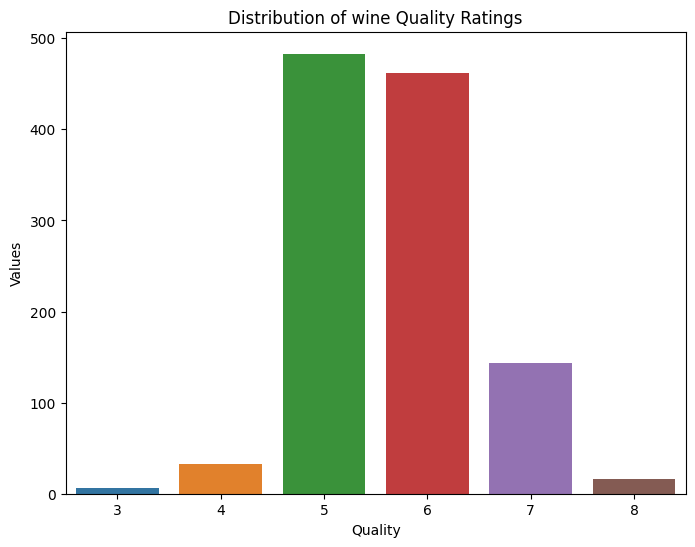

In [11]:
plt.figure(figsize = (8,6))
sns.countplot(x='quality', data =data)
plt.title('Distribution of wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Values')
plt.show()

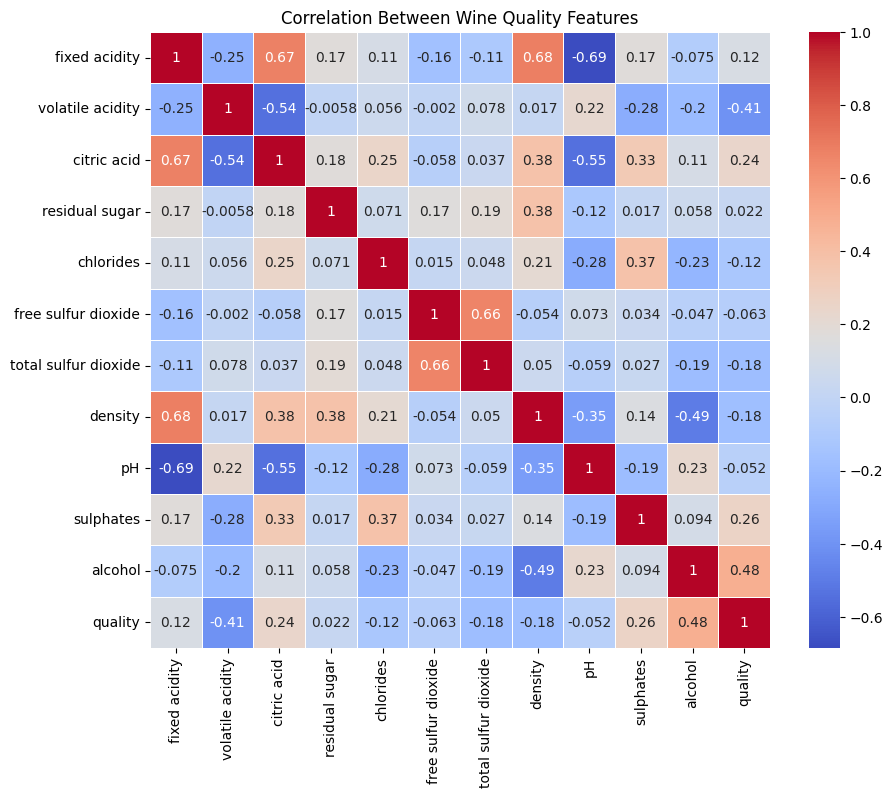

In [12]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Wine Quality Features')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


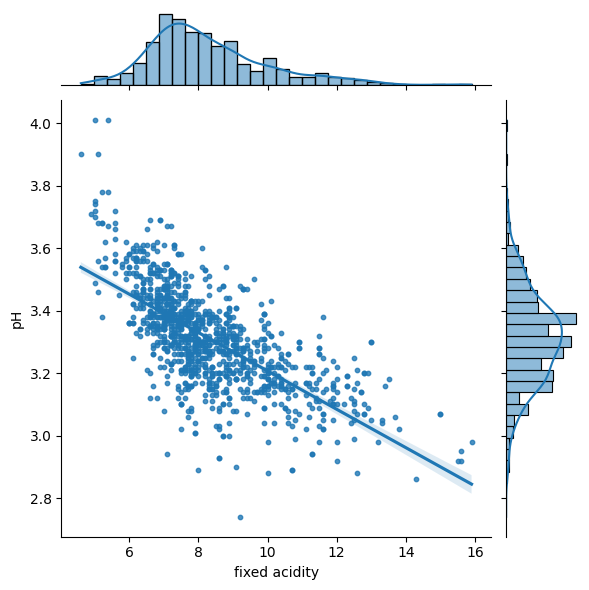

In [13]:
fixedAcidity_pH = data[['pH', 'fixed acidity']]

gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6) 

gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

gridA = gridA.plot_marginals(sns.histplot, kde=True)  # Use 'sns.histplot' for histogram with kde
plt.show()

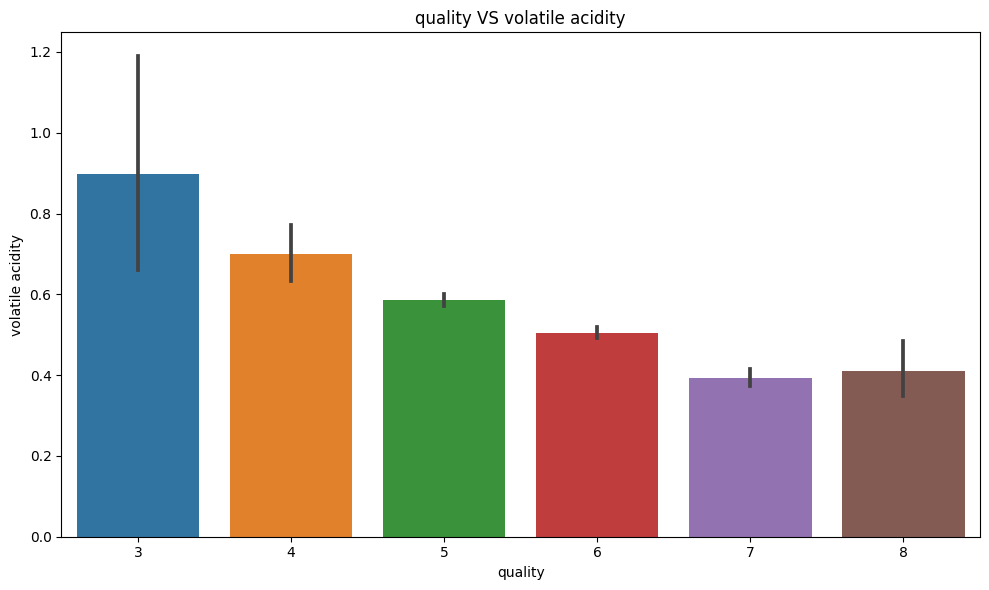

<Figure size 640x480 with 0 Axes>

In [14]:
volatileAcidity_quality = data[['volatile acidity', 'quality']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

# Prepare data for model training

In [15]:
X = data.drop('quality', axis =1)
y = data['quality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Random Forest Classifier

In [17]:
model = RandomForestClassifier(n_estimators = 100, random_state=42)


In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [19]:
y_pred= model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 70.31%


# Prediction Input

In [21]:
def predict_wine_quality():
    print("\nPlease enter the following values:")
    fixed_acidity = float(input("Fixed Acidity: "))
    volatile_acidity = float(input("Volatile Acidity: "))
    citric_acid = float(input("Citric Acid: "))
    residual_sugar = float(input("Residual Sugar: "))
    chlorides = float(input("Chlorides: "))
    free_sulfur_dioxide = float(input("Free Sulfur Dioxide: "))
    total_sulfur_dioxide = float(input("Total Sulfur Dioxide: "))
    density = float(input("Density: "))
    pH = float(input("pH: "))
    sulphates = float(input("Sulphates: "))
    alcohol = float(input("Alcohol: "))
    user_data = pd.DataFrame({
        'fixed acidity': [fixed_acidity],
        'volatile acidity': [volatile_acidity],
        'citric acid': [citric_acid],
        'residual sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free sulfur dioxide': [free_sulfur_dioxide],
        'total sulfur dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    })
    
    prediction = model.predict(user_data)
    print(f"\nPredicted Wine Quality: {prediction[0]}")
predict_wine_quality()


Please enter the following values:


Fixed Acidity:  8.9
Volatile Acidity:  0.4
Citric Acid:  0.32
Residual Sugar:  5.6
Chlorides:  0.087
Free Sulfur Dioxide:  10
Total Sulfur Dioxide:  47
Density:  0.9991
pH:  3.38
Sulphates:  0.77
Alcohol:  10.5



Predicted Wine Quality: 7
